# Setting up environment

In [ ]:
# Installing mmseg (or Clone mmseg repo & setup) 
!rm -rf mmsegmentation
!git clone https://github.com/LARC-CMU-SMU/FoodSeg103-Benchmark-v1.git  
%cd FoodSeg103-Benchmark-v1                                                 
!pip install -e .
!pip install -r requirements/optional.txt

# Install PyTorch
!pip install -U torch==1.5.0+cu101 torchvision==0.6.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html
# Install MMCV (+ addict & yapf)
!pip install mmcv-full==1.3.0+torch1.5.0+cu101 -f https://download.openmmlab.com/mmcv/dist/index.html 
# Installing timm
!pip install timm

# Clone Volume Estimation Repo  #%cd ..
!git clone https://github.com/fatimamds/dietlane_app_volume
!mkdir input/
# Install labelme
!pip install labelme

# Install Flask & Pyngrok for API
!pip install flask-ngrok

Cloning into 'FoodSeg103-Benchmark-v1'...
remote: Enumerating objects: 775, done.
remote: Counting objects: 100% (775/775), done.
remote: Compressing objects: 100% (372/372), done.
remote: Total 775 (delta 421), reused 728 (delta 394), pack-reused 0
Receiving objects: 100% (775/775), 3.63 MiB | 8.91 MiB/s, done.
Resolving deltas: 100% (421/421), done.
/content/FoodSeg103-Benchmark-v1
Obtaining file:///content/FoodSeg103-Benchmark-v1
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=9942c97eff23ac923d9306ff876aec9bd14b6337e12a854acae436059f86b586
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built terminaltables
  Running setup.py develop for mmsegmentation
     |████████████████████████████████| 481kB 8.3MB/s 
     |████████████████████████████████| 81kB 12.6MB/s 
     |████████████████████████████████| 51kB 9.4MB/s 
     |████████████████████████████████| 92kB 

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 703.8MB 27kB/s 
     |████████████████████████████████| 6.6MB 48.7MB/s 
ERROR: torchtext 0.10.0 has requirement torch==1.9.0, but you'll have torch 1.5.0+cu101 which is incompatible.
  Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102
Looking in links: https://download.openmmlab.com/mmcv/dist/index.html
     |████████████████████████████████| 24.4MB 131kB/s 
     |████████████████████████████████| 194kB 8.2MB/s 
     |████████████████████████████████| 378kB 9.6MB/s 
Cloning into 'dietlane-app-volume'...
remote: Enumerating objects: 129, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (85/85), done.
remote: 

###### Checking Environment Installation & Importing Modules

In [ ]:
# Check nvcc version - NVIDIA CUDA Compiler
!nvcc -V
# Check GCC version
!gcc --version

# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMSegmentation installation
import mmseg
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette
from dietlane_app_volume.palette import palette
print(mmseg.__version__)

# Import other required Modules
import os                               # execfile('file.py')  # os.system('python file.py')
import json
import cv2
import matplotlib.pyplot as plt

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

1.5.0+cu101 True
0.11.0


# Fetching trained networks

In [ ]:
# Download our trained SEGMENTATION model (Encoder: ReLeM-R-50 |	Decoder: CCNet)
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=18XQnJFoxLF_2wFtFmcbQktJReOm-o64X' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=18XQnJFoxLF_2wFtFmcbQktJReOm-o64X" -O iter_80000.pth && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=16bM9qJnAfDd_mELOZKjLvnI_taZYWqaH' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=16bM9qJnAfDd_mELOZKjLvnI_taZYWqaH" -O ccnet_r50-d8_512x1024_80k.py && rm -rf /tmp/cookies.txt

--2021-07-11 22:54:13--  https://docs.google.com/uc?export=download&confirm=Ow2Q&id=18XQnJFoxLF_2wFtFmcbQktJReOm-o64X
Resolving docs.google.com (docs.google.com)... 142.251.2.138, 142.251.2.139, 142.251.2.101, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-8c-docs.googleusercontent.com/docs/securesc/87k3jjhisnahpbd70po57jqrib7ndfoo/d5dsdq32qqmp3274ngd7hiav3a5pvc0a/1626044025000/15780393842409038990/11237522626022811119Z/18XQnJFoxLF_2wFtFmcbQktJReOm-o64X?e=download [following]
--2021-07-11 22:54:13--  https://doc-0c-8c-docs.googleusercontent.com/docs/securesc/87k3jjhisnahpbd70po57jqrib7ndfoo/d5dsdq32qqmp3274ngd7hiav3a5pvc0a/1626044025000/15780393842409038990/11237522626022811119Z/18XQnJFoxLF_2wFtFmcbQktJReOm-o64X?e=download
Resolving doc-0c-8c-docs.googleusercontent.com (doc-0c-8c-docs.googleusercontent.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to d

In [ ]:
# Download our trained DEPTH model (Senet)
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1QaUkdOiGpMuzMeWCGbey0sT0wXY0xtsj' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1QaUkdOiGpMuzMeWCGbey0sT0wXY0xtsj" -O pretrained_model.zip && rm -rf /tmp/cookies.txt
!unzip pretrained_model.zip  #unzipping
!rm -r pretrained_model.zip  #removing zipped file to free space

--2021-07-11 22:48:53--  https://docs.google.com/uc?export=download&confirm=9G5S&id=1QaUkdOiGpMuzMeWCGbey0sT0wXY0xtsj
Resolving docs.google.com (docs.google.com)... 142.251.2.100, 142.251.2.139, 142.251.2.113, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-5g-docs.googleusercontent.com/docs/securesc/s0qtomtut9576vnmneocesljso6v8q5k/7pagps0ns5vd56ifjqn8qemp7usmkch3/1626043725000/05335383375687547470/07621166637766165342Z/1QaUkdOiGpMuzMeWCGbey0sT0wXY0xtsj?e=download [following]
--2021-07-11 22:48:53--  https://doc-0k-5g-docs.googleusercontent.com/docs/securesc/s0qtomtut9576vnmneocesljso6v8q5k/7pagps0ns5vd56ifjqn8qemp7usmkch3/1626043725000/05335383375687547470/07621166637766165342Z/1QaUkdOiGpMuzMeWCGbey0sT0wXY0xtsj?e=download
Resolving doc-0k-5g-docs.googleusercontent.com (doc-0k-5g-docs.googleusercontent.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to d

###### Building our Food Segmentation Model

In [ ]:
# build the model from a config file and a checkpoint file
config_file = './ccnet_r50-d8_512x1024_80k.py' 
checkpoint_file = './iter_80000.pth'
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

# Executing program

In [ ]:
def predict_mask():
  # test a single image
  img = 'input/test.png'
  if cv2.imread(img).shape[2]==4:
      img = img[:,:,:3]
      cv2.imwrite('input/test.png', img)
  result = inference_segmentor(model, img)
  # save the visualization results to image files
  model.show_result(img, result,  palette=palette, out_file='demo/result.png')

# !python "dietlane_app_volume/masktojson.py"
# !python "dietlane_app_volume/demo.py"
def find_vol():
  os.system('python dietlane_app_volume/masktojson.py')
  os.system('python dietlane_app_volume/demo.py')
  with open('output/volume.json') as json_file:
    data = json.load(json_file)  # returns JSON object as a python dictionary/list
  return data

def clear_input():
  os.remove("input/test.png")

def display_out():
  with open('output/volume.json') as json_file:
    data = json.load(json_file) 
  print(data)
  org = cv2.cvtColor(cv2.imread("input/test.png"), cv2.COLOR_BGR2RGB)
  mask = cv2.cvtColor(cv2.imread("demo/rgb_mask.png"), cv2.COLOR_BGR2RGB)
  gray = cv2.cvtColor(cv2.imread("output/out_grey.png"), cv2.COLOR_BGR2RGB)
  rgbd = cv2.cvtColor(cv2.imread("output/out_color.png"), cv2.COLOR_BGR2RGB)
  array_img = [org, mask, gray, rgbd]
  for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(array_img[i])
  plt.show()

In [ ]:
# clear_input()
predict_mask()
find_vol()

[{'calories': 180,
  'carbs': 0.68,
  'fats': 14.15,
  'fiber': 0,
  'measure': 21.77947823450511,
  'name': 'egg',
  'proteins': 11.76},
 {'calories': 144,
  'carbs': 4.42,
  'fats': 9.12,
  'fiber': 0.7,
  'measure': 30.746868704812634,
  'name': 'steak',
  'proteins': 11.87},
 {'calories': 175,
  'carbs': 0.09,
  'fats': 7.67,
  'fiber': 0,
  'measure': 49.7408040507199,
  'name': 'chicken',
  'proteins': 26.37},
 {'calories': 148,
  'carbs': 15.47,
  'fats': 6.14,
  'fiber': 0.7,
  'measure': 378.634919124176,
  'name': 'noodles',
  'proteins': 7.73}]

[{'name': 'turkey', 'measure': 404.0728287052632, 'calories': 336, 'proteins': 18.91, 'fats': 28.23, 'carbs': 0, 'fiber': 0}, {'name': 'cilantro mint', 'measure': 40.36340921210434, 'calories': 23, 'proteins': 2.13, 'fats': 0.52, 'carbs': 3.67, 'fiber': 2.8}]


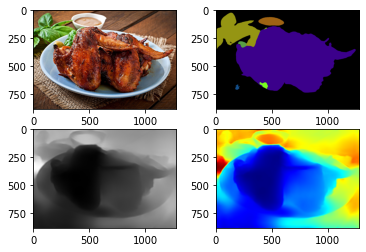

In [ ]:
display_out()

# Setting up Flask API

In [ ]:
from flask import Flask
from flask import jsonify, make_response, request
from flask_ngrok import run_with_ngrok

import numpy as np 
import base64

#os.environ["FLASK_ENV"] = "development"   #import os

# Running the Flask app
app = Flask(__name__)
run_with_ngrok(app)

# Define Flask routes
@app.route("/", methods=['GET'])
def index():
  return "Hello from Colab!"

@app.route("/trialroute")
def postyy():
  return "Another hi"

@app.route('/uploadimage' , methods=['POST'])
def predict_vol():
  img_str = request.json['image']
  org_str = base64.b64decode(img_str)
  npimg = np.fromstring(org_str, np.uint8)
  img = cv2.imdecode(npimg,cv2.IMREAD_COLOR)
  clear_input()
  cv2.imwrite('input/test.png', img)
  predict_mask()
  vol_data = find_vol()
  print(vol_data)
  return jsonify({'foodprofile': vol_data})

if __name__ == '__main__':
  app.run()  #app.run(Debug=True)   #if os.environ = development

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://3c1f157477fc.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [12/Jul/2021 01:10:55] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Jul/2021 01:10:56] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [12/Jul/2021 01:10:57] "GET / HTTP/1.1" 200 -
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
127.0.0.1 - - [12/Jul/2021 01:12:06] "POST /uploadimage HTTP/1.1" 200 -


[{'name': 'turkey', 'measure': 404.0728287052632, 'calories': 336, 'proteins': 18.91, 'fats': 28.23, 'carbs': 0, 'fiber': 0}, {'name': 'cilantro mint', 'measure': 40.36340921210434, 'calories': 23, 'proteins': 2.13, 'fats': 0.52, 'carbs': 3.67, 'fiber': 2.8}]


In [ ]:
f = 15